# Red Wine Quality Prediction

# Problem Statement:



The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information



Input variables (based on physicochemical tests):


1 - fixed acidity


2 - volatile acidity



3 - citric acid



4 - residual sugar



5 - chlorides




6 - free sulfur dioxide



7 - total sulfur dioxide



8 - density




9 - pH



10 - sulphates




11 - alcohol



Output variable (based on sensory data):




12 - quality (score between 0 and 10)




What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.


This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.



You need to build a classification model. 

# Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

 # Always refer.
For any queries about algorithm follow the given below link.




https://scikit-learn.org/stable/index.html

In [704]:
#lets import Necessary Libraries
import numpy as np
import pandas as pd

In [705]:
#Load Dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [706]:
#Lets check the shape of the data
data.shape

(1599, 12)

So, we have 12 columns and 1599 rows.

In [707]:
#Checking Nan Values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So, We dont any null values we are good to proceed.

In [708]:
#Lets check the datatype of the columns
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

So, as we know that float values are 99% times are continious data .and we have all float values  and we have 1 int type . .

In [709]:
#Lets check the uniques values of quality
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [710]:
#Lets use loc method and check thre is any blank space are available in target columns.
data.loc[data['quality']==" "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


So we dont have any blank space in label column and we good to proceed.

In [711]:
#Lets check data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# EDA (Exploratory Data Analysis)

# Scatter Plot

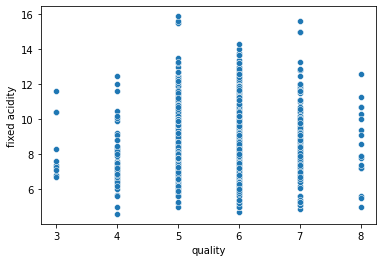

In [712]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='quality',y='fixed acidity',data=data)
plt.show()

For quality  4 5 6 7  fixed acidity is gaining

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

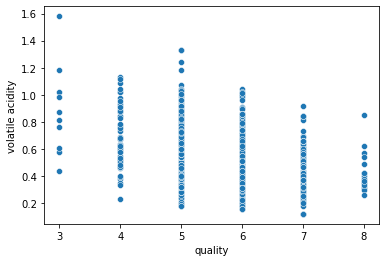

In [713]:
sns.scatterplot(x='quality',y='volatile acidity',data=data)

for quality 4 5 6 7 volatile acidity is gaining

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

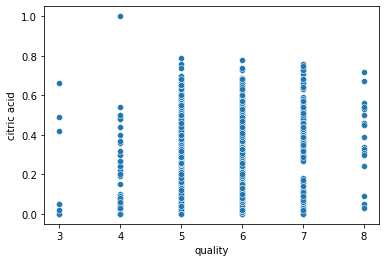

In [714]:
sns.scatterplot(x='quality',y='citric acid',data=data)

For quality 4,5,6,7, citric acid is gaining

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

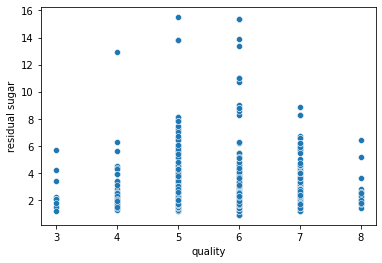

In [715]:
sns.scatterplot(x='quality',y='residual sugar',data=data)

For quality 5,6,7 residual sugar is gaining

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

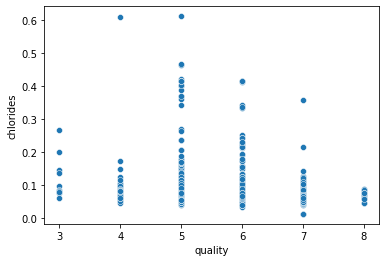

In [716]:
sns.scatterplot(x='quality',y='chlorides',data=data)

for quality 5,6 chlorides is gaining

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

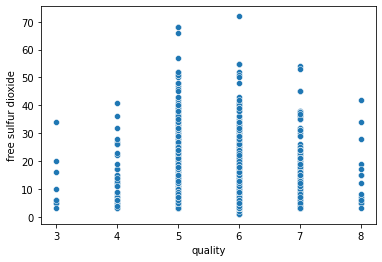

In [717]:
sns.scatterplot(x='quality',y='free sulfur dioxide',data=data)

For quality 5,6,7 free sulfur dioxide is gaining

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

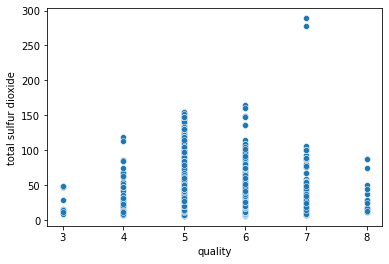

In [718]:
sns.scatterplot(x='quality',y='total sulfur dioxide',data=data)

for quality 5,6 total_sulfer dioxide is gaining

<AxesSubplot:xlabel='quality', ylabel='density'>

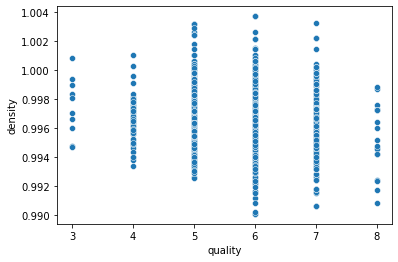

In [719]:
sns.scatterplot(x='quality',y='density',data=data)


for quality 5,6,7 density is gaining

<AxesSubplot:xlabel='quality', ylabel='pH'>

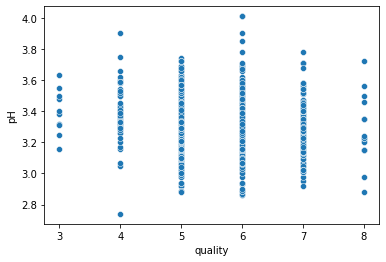

In [720]:
sns.scatterplot(x='quality',y='pH',data=data)

For quality 5,6,7 ph is gaining

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

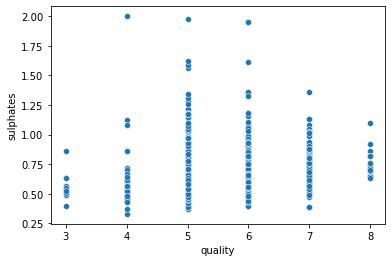

In [721]:
sns.scatterplot(x='quality',y='sulphates',data=data)


For quality 5,6,7 sulphates are gaining.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

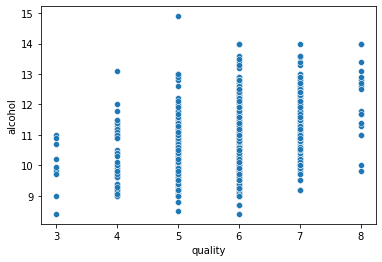

In [722]:
sns.scatterplot(x='quality',y='alcohol',data=data)

for quality 4,5,6,7 alcohol is gaining

In [723]:
#Lets check value counts of target variable

In [724]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#so here we clearly see our dataset in not balanced dataset. lets use over sampling method to balance the dataset.before that lets check correlation 

# Correlation

In [725]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [726]:
#Lest check correlation with target columns in sorted values
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [727]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

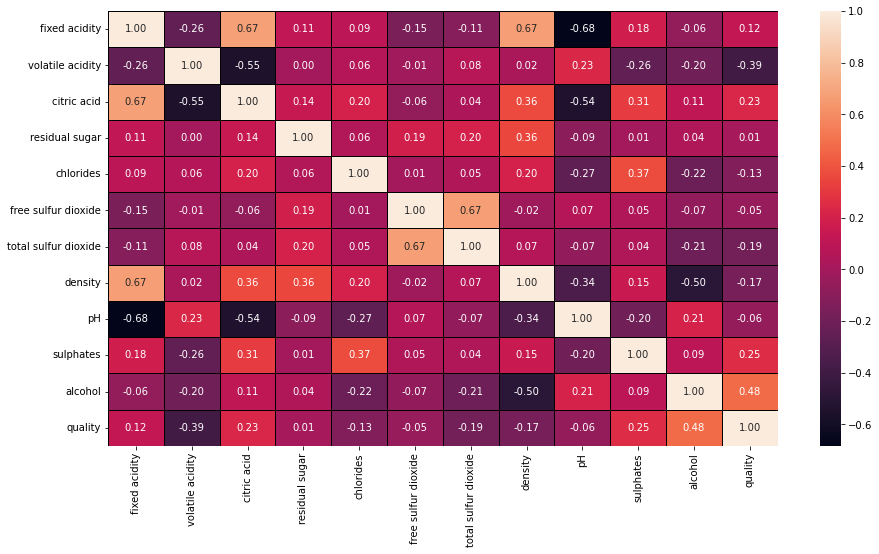

In [728]:
#Lets plot in heatmap and check
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black',fmt="0.2f")

# Outcome of Correlation :-

In [729]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- All the column of the dataset is positively and Negatively  correlated with the target column

1 -fixed acidity has 12  percent correlation with the target column which can be  considered as a weak bond.

2- volatile acidity has 39  percent correlation with the target column which can be considered as a weak bond.

3- citric acid has 23  percent correlation with the target column which can be  considered as a weak bond.

4- residual sugar has 10   percent correlation with the target column which can be  considered as a weak bond.


5- chlorides has 13   percent correlation with the target column which can be  considered as a weak bond.


6- free sulfur dioxide has 5   percent correlation with the target column which can be  considered as a weak bond


7- total sulfur dioxide has 19   percent correlation with the target column which can be  considered as a weak bond


8 - density has 17   percent correlation with the target column which can be  considered as a weak bond


9 - pH  has 6%  percent correlation with the target column which can be  considered as a weak bond

10- sulphates has 25%  percent correlation with the target column which can be  considered as a weak bond

11- alcohol has 48 % percent correlation with the target column which can be  considered as a good bond




Maximum Correlation - Alcohol


Minimum Correlation - free sulfur dioxid


# Describing the Dataset

In [730]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


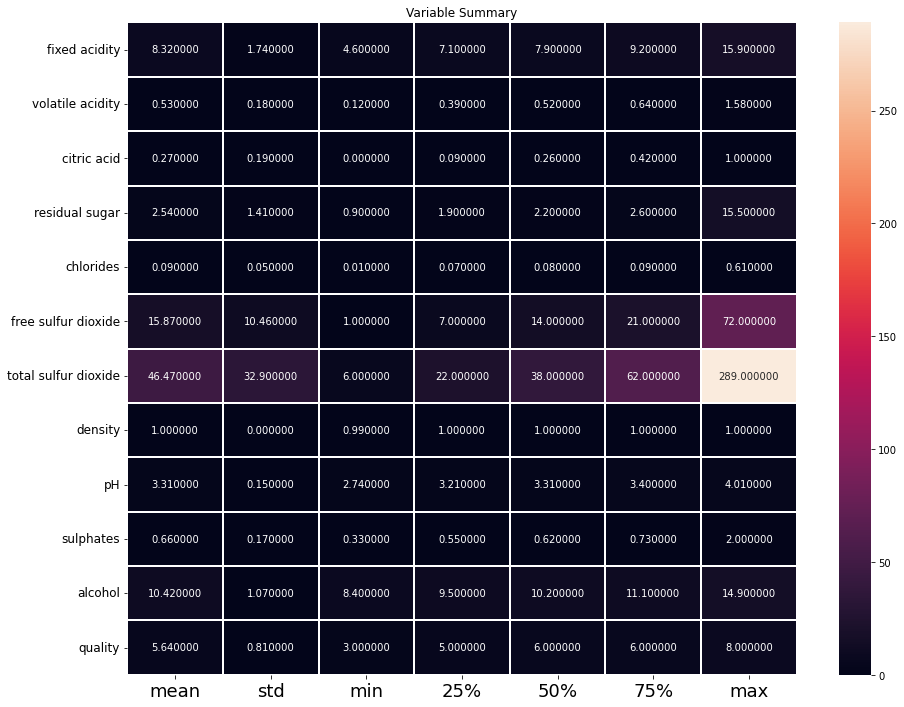

In [731]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

In [732]:
#Lets check the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the above code we can have the columns datatype and memory used by the data frame

# Outliers Checking

In [733]:
import warnings
warnings.filterwarnings('ignore')

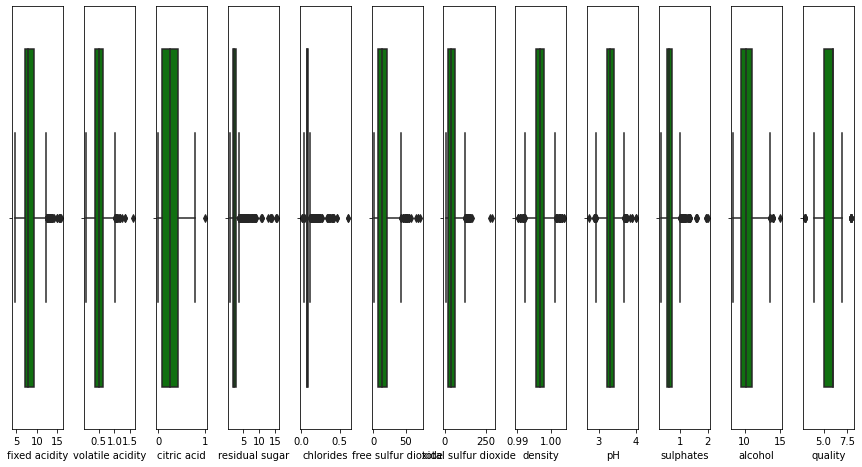

In [734]:
collist=data.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='h')
    plt.tight_layout()

From the above outcome we can see that columns ['citric acid','total sulfur dioxide','fixed acidity','volatile acidity', 'alcohol','pH','sulphates',] has less outliers , columns['residual sugar', 'chlorides','free sulfur dioxide','density',] has more outliers while the outcome columns has no outliers.

# SKEWNESS :

In [735]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Outcome of the skewness . skewness threshold is taken is +/-0.5 columns which are having skewness.

- fixed acidity
- volatile acidity 
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- sulphates
- alcohol





# Checking Distribution 

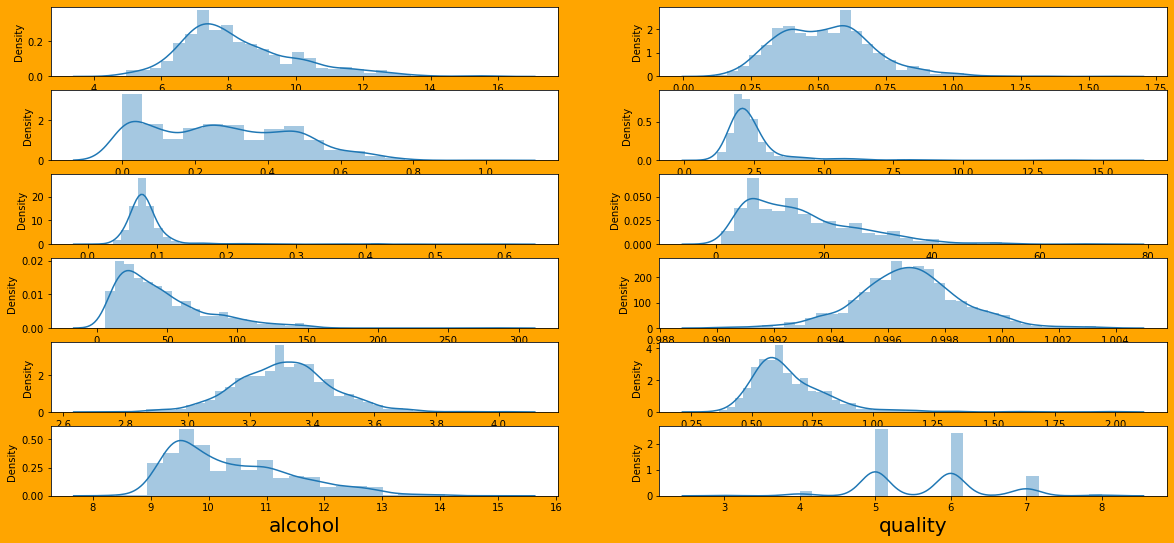

In [736]:
plt.figure(figsize=(20,9),facecolor='orange')
plotnumber=1
for col in data:
    if plotnumber <=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
        plotnumber +=1
plt.show()
    

Seems Look like all features is not distributed Normally.(Some have right skewed some have left skewed and all features have outliers .

# Data Preprocessing

# Data Cleaning

In [737]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

Here i am setting threshold +/- 0.1 .its not standard . dataset demands .becasue we have very less row and columns.

In [738]:
data=data.drop(['residual sugar','free sulfur dioxide','pH'],axis=1)
data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


# Removing Outliers

In [739]:
import numpy as np
from scipy.stats import zscore

In [740]:
z=np.abs(zscore(data))
z.shape

(1599, 9)

In [741]:
threshold=3 #Rule of Thumb
#Index Number
print(np.where(z>3))

(array([  13,   15,   17,   17,   19,   38,   42,   43,   81,   81,   83,
         86,   88,   91,   92,  106,  106,  109,  120,  126,  127,  142,
        144,  147,  151,  151,  151,  169,  169,  181,  199,  226,  226,
        240,  243,  244,  258,  258,  281,  291,  339,  340,  347,  354,
        374,  381,  391,  442,  442,  451,  459,  467,  480,  515,  517,
        544,  554,  554,  555,  555,  557,  557,  568,  588,  591,  608,
        614,  636,  639,  649,  651,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  723,  724,  730,  754,  776,  777,  795,  821,
        832,  836,  837,  889,  899, 1017, 1018, 1051, 1051, 1079, 1081,
       1114, 1165, 1244, 1260, 1269, 1269, 1270, 1270, 1288, 1289, 1299,
       1299, 1312, 1319, 1319, 1367, 1370, 1370, 1372, 1372, 1374, 1374,
       1434, 1435, 1469, 1474, 1476, 1478, 1493, 1496, 1505, 1558, 1570],
      dtype=int64), array([6, 4, 3, 6, 3, 1, 3, 6, 3, 6, 3, 6, 6, 6, 6, 3, 6, 4, 1, 1, 1, 7,
       7, 3, 2, 3, 6, 3, 6, 3

In [742]:
len(np.where(z>3)[0])

132

In [743]:
df_new=data[(z<3).all(axis=1)]
print("Old DataFrame ",data.shape)
print("New DataFrame ",df_new.shape)
print("Total Drop Columns are ",data.shape[0]-df_new.shape[0])

Old DataFrame  (1599, 9)
New DataFrame  (1491, 9)
Total Drop Columns are  108


# Percent data loss

In [744]:
loss_percent=(1599-1491)/1599*100
print(loss_percent," % ")

6.75422138836773  % 


Checking wheather how much outliers are still here . if the outliers there help in the testing the model or not

Model without outliers is data and model with desired outliers is df_new 

In [750]:
#Lets create one funntion for convert our target in binary classification

data['best quality'] = [1 if x > 7 else 0 for x in data.quality]

# 1 is for good
# 0 is for bad.


#Here we usinn list comprehension for creating new column for making our target column as binary classification,
#Because in our task, we have to plot ROC curve .and ROC only apply on Binary Classification.

In [749]:
data

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5,0
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5,0
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5,0
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6,1
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5,0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6,1
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6,1
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5,0


# Model without outliers is data and model with desired outliers is df_new 

In [753]:
#Independent Column
x=data.drop(columns=['quality','best quality'])
#Dependent Column
y=data['best quality']

# Transforming data to remove skewness

In [754]:
from sklearn.preprocessing import power_transform

In [755]:
x=power_transform(x,method='yeo-johnson')
x

array([[-4.42665887e-01,  9.95541630e-01, -1.53110932e+00, ...,
         5.64441955e-01, -5.81649810e-01, -1.07502541e+00],
       [-1.61307687e-01,  1.77129873e+00, -1.53110932e+00, ...,
         3.69665306e-02,  3.95139954e-01, -5.00859609e-01],
       [-1.61307687e-01,  1.26980139e+00, -1.25535866e+00, ...,
         1.42851242e-01,  1.83771552e-01, -5.00859609e-01],
       ...,
       [-1.36436736e+00,  3.87065014e-04, -6.83293826e-01, ...,
        -5.27496656e-01,  8.20841495e-01,  7.34557526e-01],
       [-1.76745837e+00,  7.28552770e-01, -7.43826364e-01, ...,
        -6.72159727e-01,  5.88343819e-01, -1.87998601e-02],
       [-1.66263981e+00, -1.32045850e+00,  1.03107021e+00, ...,
        -6.61431573e-01,  2.56369273e-01,  7.34557526e-01]])

In [756]:
#Checking skewnness
pd.DataFrame(x).skew().sort_values()

3   -0.151304
5   -0.005054
4   -0.003752
0    0.002529
1    0.003099
6    0.009985
2    0.017788
7    0.112372
dtype: float64

So here we use power transform so we dont need to use Standard Scaler

In [757]:
Counter(y_train)

Counter({5: 554, 3: 535, 4: 535, 6: 554, 8: 538, 7: 552})

# Over Sampling using SMOTE (Synthetic Minority Over Smapling Technique)

In [758]:
from imblearn.over_sampling import SMOTE
#sm=SMOTE(0.75)a

In [759]:
smt=SMOTE()
x_sample,y_sample=smt.fit_resample(x,y)


# Lets Build Model with 4 Algorithms

In [760]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.svm import SVC
s=SVC()
from sklearn.metrics import accuracy_score,classification_report

In [761]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Radom State ",i,"The Model Performs Very Well")
        print("At random State ",i,"The Model performs very well")
        print("Training Accuracy Score is :- ",accuracy_score(y_train,pred_train)*100)
        print("Testing Accuracy Score is : - ",accuracy_score(y_test,pred_test)*100,"\n")

At Radom State  43 The Model Performs Very Well
At random State  43 The Model performs very well
Training Accuracy Score is :-  74.12040656763097
Testing Accuracy Score is : -  74.0625 

At Radom State  58 The Model Performs Very Well
At random State  58 The Model performs very well
Training Accuracy Score is :-  73.80766223612197
Testing Accuracy Score is : -  73.75 

At Radom State  85 The Model Performs Very Well
At random State  85 The Model performs very well
Training Accuracy Score is :-  74.43315089913996
Testing Accuracy Score is : -  74.375 

At Radom State  191 The Model Performs Very Well
At random State  191 The Model performs very well
Training Accuracy Score is :-  74.35496481626271
Testing Accuracy Score is : -  74.375 

At Radom State  266 The Model Performs Very Well
At random State  266 The Model performs very well
Training Accuracy Score is :-  74.43315089913996
Testing Accuracy Score is : -  74.375 

At Radom State  323 The Model Performs Very Well
At random State  

For Logistic Regression we select Random State - 813

But i want to check with different algorithm


# Lets check with KNN

In [762]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    x_pred=knn.predict(x_train)
    y_pred=knn.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.8240813135261923
 At random state 0 , the testing accuracy is :- 0.734375


 At random state 1 , the testing accuracy is :- 0.8318999218139171
 At random state 1 , the testing accuracy is :- 0.7375


 At random state 2 , the testing accuracy is :- 0.836591086786552
 At random state 2 , the testing accuracy is :- 0.7


 At random state 3 , the testing accuracy is :- 0.8021892103205629
 At random state 3 , the testing accuracy is :- 0.75


 At random state 4 , the testing accuracy is :- 0.818608287724785
 At random state 4 , the testing accuracy is :- 0.734375


 At random state 5 , the testing accuracy is :- 0.8178264268960125
 At random state 5 , the testing accuracy is :- 0.73125


 At random state 6 , the testing accuracy is :- 0.8287724784988272
 At random state 6 , the testing accuracy is :- 0.7625


 At random state 7 , the testing accuracy is :- 0.8279906176700548
 At random state 7 , the testing accuracy is :- 0.7375


 At random

So i am going with random state 41

In [763]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)

In [764]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [765]:
knn.score(x_train,y_train)#Training Score

0.8045347928068803

In [766]:
knn.score(x_test,y_test)#Testing Score

0.809375

# Lets check with Decision Tree

In [767]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.75


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.746875


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.7


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.796875


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.759375


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.728125


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.75


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.7625


 At random state 8 , the testing accuracy is :- 1.0
 At random state 8 , the testing accuracy is :- 0.728125


 At random state

In [769]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

In [770]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [771]:
dt.score(x_train,y_train)

1.0

In [772]:
dt.score(x_test,y_test)

0.809375

# Do Hyperparameter Tuning

In [773]:
from sklearn.model_selection import GridSearchCV

In [774]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [775]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [776]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [777]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='gini',max_depth=12,max_leaf_nodes=11,min_samples_split= 12)

In [778]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [779]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=11, min_samples_split=12)

In [780]:
cnn.score(x_train,y_train)

0.7677873338545739

In [781]:
cnn.score(x_test,y_test)

0.703125

# Lets check with Random Forest


In [782]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [783]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 1.0
 At random state 0 , the testing accuracy is :- 0.828125


 At random state 1 , the testing accuracy is :- 1.0
 At random state 1 , the testing accuracy is :- 0.83125


 At random state 2 , the testing accuracy is :- 1.0
 At random state 2 , the testing accuracy is :- 0.765625


 At random state 3 , the testing accuracy is :- 1.0
 At random state 3 , the testing accuracy is :- 0.834375


 At random state 4 , the testing accuracy is :- 1.0
 At random state 4 , the testing accuracy is :- 0.828125


 At random state 5 , the testing accuracy is :- 1.0
 At random state 5 , the testing accuracy is :- 0.825


 At random state 6 , the testing accuracy is :- 1.0
 At random state 6 , the testing accuracy is :- 0.8


 At random state 7 , the testing accuracy is :- 1.0
 At random state 7 , the testing accuracy is :- 0.8375


 At random state 8 , the testing accuracy is :- 1.0
 At random state 8 , the testing accuracy is :- 0.8125


 At random sta

In [784]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [785]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [786]:
rf.score(x_train,y_train)

1.0

In [787]:
rf.score(x_test,y_test)

0.84375

#  Do Hyperparameter Tuning

In [788]:
from sklearn.model_selection import GridSearchCV

In [789]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [790]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [791]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [792]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 5, 'min_samples_split': 3}


In [793]:
#Initiate DecisionTreeClassifier with new parameter and train.

rf=RandomForestClassifier(criterion='gini',max_depth=29,max_leaf_nodes=89,min_samples_split= 22)

In [866]:
#Initiate DecisionTreeClassifier with new parameter and train.

rf=RandomForestClassifier(criterion='entropy',max_depth=37,max_leaf_nodes=78,min_samples_split=36)

In [867]:
#Train the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=37, max_leaf_nodes=78,
                       min_samples_split=36)

In [868]:
rf.score(x_train,y_train)

0.854573885848319

In [869]:
rf.score(x_test,y_test)

0.8125

# Lets check with SVM

In [870]:
from sklearn.svm import SVC
s=SVC()

In [871]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    s.fit(x_train,y_train)
    x_pred=s.predict(x_train)
    y_pred=s.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.7881157154026583
 At random state 0 , the testing accuracy is :- 0.7375


 At random state 1 , the testing accuracy is :- 0.8014073494917905
 At random state 1 , the testing accuracy is :- 0.75


 At random state 2 , the testing accuracy is :- 0.8053166536356529
 At random state 2 , the testing accuracy is :- 0.7375


 At random state 3 , the testing accuracy is :- 0.7904612978889758
 At random state 3 , the testing accuracy is :- 0.784375


 At random state 4 , the testing accuracy is :- 0.7928068803752932
 At random state 4 , the testing accuracy is :- 0.75


 At random state 5 , the testing accuracy is :- 0.7888975762314308
 At random state 5 , the testing accuracy is :- 0.79375


 At random state 6 , the testing accuracy is :- 0.7881157154026583
 At random state 6 , the testing accuracy is :- 0.7625


 At random state 7 , the testing accuracy is :- 0.7849882720875684
 At random state 7 , the testing accuracy is :- 0.76875


 At rand

In [872]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=61)

In [873]:
s.fit(x_train,y_train)

SVC()

In [874]:
s.score(x_train,y_train)

0.7888975762314308

In [879]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=61)

In [880]:
s.fit(x_train,y_train)

SVC()

In [881]:
s.score(x_train,y_train)

0.7888975762314308

In [882]:
s.score(x_test,y_test)

0.80625

# Lets Do Hyperparameter Tuning

In [917]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [918]:
param_grid={'C':[5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}

In [919]:
gridsearch=GridSearchCV(s,param_grid)

gridsearch.fit(x_train,y_train)



#Best Param
gridsearch.best_params_


{'C': 10, 'gamma': 0.01}

In [920]:
svc=SVC(C=22,gamma=0.07)
svc.fit(x_train,y_train)


#call the function and pass dataset to check train and test_score

svc.score(x_train,y_train)

0.8162627052384676

In [921]:
svc.score(x_test,y_test)

0.80625

So, Here we try 5 Supervised machine learning algorithm , and we support vector machine  is the best algorithm for our dataset 
And now we good to proceed.

In [923]:
#Lets check one more time score
svc.score(x_train,y_train) #Checking training score

0.8162627052384676

In [929]:
y_pred=svc.predict(x_test) #Checking testing score

# Cross Validation Score for Logistic Regression

In [930]:
svc.fit(x_train,y_train)
pred_lr=svc.predict(x_test)
from sklearn.model_selection import cross_val_score


lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(svc,x,y,cv=j)
    lsc=lsscore.mean()
    print("At CV : - ",j)
    print("cross validation score is ",lsc*100)
    print("accuracy_score is :- ",lss*100)
    print("\n")

At CV : -  2
cross validation score is  67.48146120150187
accuracy_score is :-  80.625


At CV : -  3
cross validation score is  71.29455909943715
accuracy_score is :-  80.625


At CV : -  4
cross validation score is  70.16917293233082
accuracy_score is :-  80.625


At CV : -  5
cross validation score is  71.41986677115987
accuracy_score is :-  80.625


At CV : -  6
cross validation score is  70.92356359062451
accuracy_score is :-  80.625


At CV : -  7
cross validation score is  69.98856311083385
accuracy_score is :-  80.625


At CV : -  8
cross validation score is  70.54302763819095
accuracy_score is :-  80.625


At CV : -  9
cross validation score is  70.92088279481156
accuracy_score is :-  80.625




In [931]:
#So here we got almost same as SVC result.

# AUC ROC Curve 

In [926]:
#Lets import ROC and AUC curve.
from sklearn.metrics import roc_curve,auc


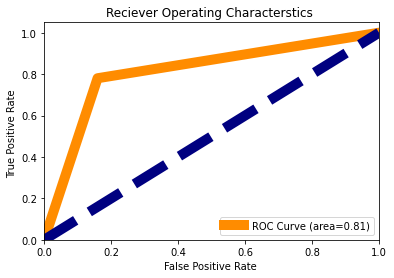

In [928]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve (area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate ')
plt.title("Reciever Operating Characterstics ")
plt.legend(loc='lower right')
plt.show()


So Basically Blue line shows the 50% of the dataset.  and yellow line show how much our model learn the data . 

So. We get 80% with SVC and same result we get from Cross Validation. . 

# Lets Save Our Model

In [934]:
import pickle
filename='redwine.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [935]:
loaded_model=pickle.load(open('redwine','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.1875


In [940]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
Predicted,0,1,0,1,1,1,0,1,1,0,...,1,0,0,1,0,1,0,1,0,0
Original,0,0,1,1,1,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,1


So, Here We Completed Our Model.

We use SVM Machine learning algorithm.for predicting model.


 1 -  is for Good Quality 
 
 2 -  is for Bad  Quality





In [941]:
#Student of DataScience
#Student of DataTrained - Saurav
#Date - 31-10-2022
#Time - 21:10